<a href="https://colab.research.google.com/github/vihrao/MLandAI/blob/main/A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install --upgrade torch
!pip install --upgrade torchtext --force-reinstall --no-cache-dir
!pip install transformers==4.28.1



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 865.2/865.2 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.1/393.1 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 113.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 98.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.7/897.7 kB 59.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 571.0/571.0 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.2/200.2 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 66.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 44.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.2/158.2 MB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.6/216.6 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.8/156.8 MB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 40.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 44.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━ 616.6/865.2 MB 133.8 MB/s eta 0:00:02^C
^C


In [1]:
import pandas as pd
import re
import nltk
#import torchtext
from sklearn.model_selection import train_test_split
from transformers import GPT2Tokenizer
import torch
torch.__version__

'2.7.0+cu126'

Here we remove stop words. Print text rows. Note the mode is untrained with 50% labeled as 0 and another 50% labeled 1





In [3]:
##cleaning up the text

nltk.download('stopwords')
stopWords = set(nltk.corpus.stopwords.words("english"))
def CleanText(text):
    text = text.lower()
    text = re.sub("[^a-z]", " ", text)
    words = [word for word in text.split() if word not in stopWords]
    text = " ".join(words)
    return text
import pandas as pd
df= pd.read_csv("/content/IMDB_Dataset.csv")
print(df.head())

df["review"]=df.apply(lambda row: CleanText(row["review"]), axis=1)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                              review  sentiment
0  Once again Mr. Costner has dragged out a movie...          0
1  This is an example of why the majority of acti...          0
2  First of all I hate those moronic rappers, who...          0
3  Not even the Beatles could write songs everyon...          0
4  Brass pictures (movies is not a fitting word f...          0


In [4]:
review_length=df['review'].str.split().str.len()
review_length.describe()

,review
count,50000.000000
mean,122.192080
std,92.548305
min,3.000000
25%,65.000000
50%,90.000000
75%,149.000000
max,1442.000000


The average length of a reviews is 122, the shortest review length is 3 and the longest is 1442.

Therefore we need to pad the sequences to equal length.

The following padding function performs padding if the length of a sequence is less than the threshold and truncate the ones which are longer than threshold to the threshold.  We choose the threshold to be 256 tokens.

In [5]:

tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
tokenizer.pad_token = "[PAD]"
df["token_ids"] = df["review"].apply(lambda x: tokenizer.encode(x, padding='max_length', truncation=True, max_length=256))

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

In [6]:
data = df["token_ids"]
labels = df.sentiment

In [7]:
x_train_val,x_test,y_train_val,y_test = train_test_split(data,labels,stratify=labels,test_size=0.20, random_state=42)
x_train,x_val,y_train,y_val = train_test_split(x_train_val,y_train_val,stratify=y_train_val,test_size=0.10, random_state=42)

In [8]:
print(x_train.shape,x_val.shape,x_test.shape)
print(y_train.shape,y_val.shape,y_test.shape)

(36000,) (4000,) (10000,)
(36000,) (4000,) (10000,)


## now you have your training, validation and test set ready, you can implement the networks

Embedding layer to map word index indo dense vector to capture menaing and context.
Will help in traninng phase to learn embedding weights where similar words in context will ahve similar vectors
Pass these through nn.Embedding(vocab_size, embedding_dim).

1.   Maps integers to dense vectors, where each tolken becomes a vector of size embedding_dim 128. Embedding space can capture meaning/similarity.
2.   Create a simple model and test it with preprocessed tokenzied reviews
3.   Print input and output shape
4.   print raw logits: unprocessed outputs from nn final layer before softmax activation
5.   Compute softmax output (see formulat below)
6.   Compare it with actual labels

$$\text{softmax}(x_i) = \frac{e^{x_i}}{\sum_j e^{x_j}}$$
Example 1 raw logits: tensor([[2.5000, 0.5000]])

After softmax: tensor([[0.8808, 0.1192]])

Calculate e^(x_i) for each logit:

$$e^{2.5} \approx 12.1825$$
$$e^{0.5} \approx 1.6487$$
12.1825 + 1.6487 = 13.8312


Divide each $$e^{x_i}$$ by the sum:

For class 0: 12.1825 / 13.8312 ≈ 0.8808 (88.08%)

For class 1: 1.6487 / 13.8312 ≈ 0.1192 (11.92%)

In [9]:
import numpy as np
# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cuda


##Simple vanilla NN layer
Option 1: embedding layer and output layer
embedding layer maps the each input word to embedding_dim vector (64 or 128 or 256), which gives out single vector for the sentence after averaging each embedding_dim vector of each word
output layer maps the output embedding_dim vector to 2 outputs and softmax on 2 outputs to predict one class 0 or 1
Tokens → Embedding → Average → Linear Layer → 2 Outputs

Option 2: embedding layer, hidden layer, output layer
Adds a hidden layer option with hidden embedding_dim vector 128 or 256 nodes with ReLu activation provides a embedding_dim vector as the case may be 128 or 256 which sfotmax via output layer 2 outputs and a class prediction 0 or 1
Tokens → Embedding → Average → Hidden Linear Layer → ReLU → Output Linear Layer → 2 Outputs


Using device: cuda
Starting Simple Text Classifier training...
Converting data to tensors...
x_train type: <class 'pandas.core.series.Series'>
y_train type: <class 'pandas.core.series.Series'>
x_train_tensor shape: torch.Size([36000, 256])
y_train_tensor shape: torch.Size([36000])
x_val_tensor shape: torch.Size([4000, 256])
y_val_tensor shape: torch.Size([4000])
Creating datasets and dataloaders...
Starting hyperparameter optimization...
Grid: {'embedding_dim': [64, 128, 256], 'hidden_dim': [None, 128, 256], 'dropout_rate': [0.3, 0.5], 'learning_rate': [0.001, 0.0005]}

Trying: embedding_dim=64, hidden_dim=None, dropout_rate=0.3, learning_rate=0.001
Quick evaluation - Val Accuracy: 0.7927

Trying: embedding_dim=64, hidden_dim=None, dropout_rate=0.3, learning_rate=0.0005
Quick evaluation - Val Accuracy: 0.6202

Trying: embedding_dim=64, hidden_dim=None, dropout_rate=0.5, learning_rate=0.001
Quick evaluation - Val Accuracy: 0.7105

Trying: embedding_dim=64, hidden_dim=None, dropout_rate=

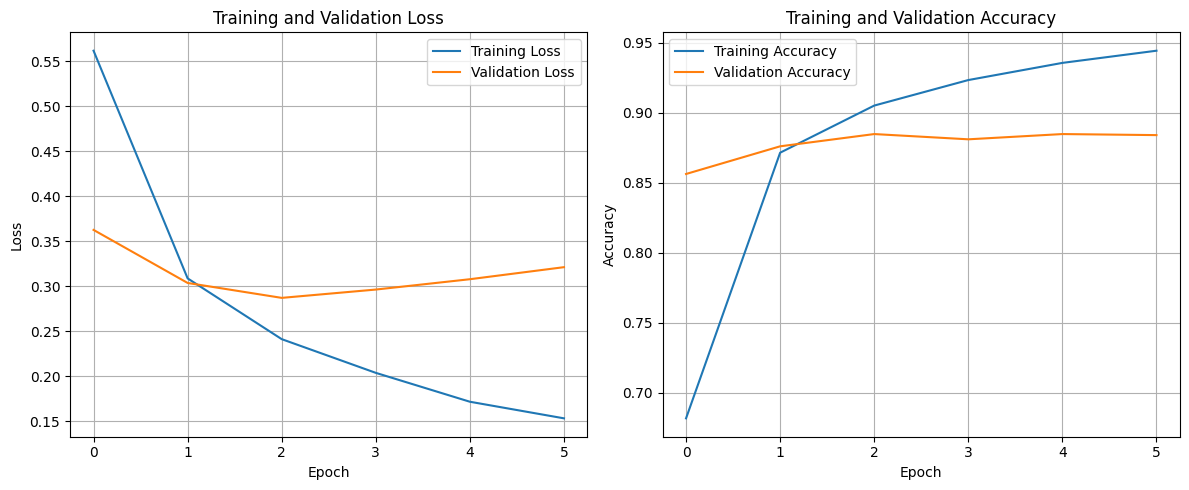


Training Complete!
Test Accuracy: 0.8871
Best Hyperparameters: {'embedding_dim': 256, 'hidden_dim': 128, 'dropout_rate': 0.3, 'learning_rate': 0.001}


In [25]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import time

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

class SimpleTextClassifier(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim=None, dropout_rate=0.5, num_classes=2, pad_idx=0):
        super(SimpleTextClassifier, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=pad_idx)

        if hidden_dim:
            # Version with a hidden layer
            self.fc1 = nn.Linear(embedding_dim, hidden_dim)
            self.relu = nn.ReLU()
            self.dropout = nn.Dropout(dropout_rate)
            self.fc2 = nn.Linear(hidden_dim, num_classes)
        else:
            # Simple version without hidden layer
            self.dropout = nn.Dropout(dropout_rate)
            self.fc = nn.Linear(embedding_dim, num_classes)

        self.hidden_dim = hidden_dim

    def forward(self, input_ids):
        x = self.embedding(input_ids)  # [batch_size, seq_len, embed_dim]
        x = x.mean(dim=1)  # Average embeddings across sequence length

        if self.hidden_dim:
            # With hidden layer
            x = self.fc1(x)
            x = self.relu(x)
            x = self.dropout(x)
            out = self.fc2(x)
        else:
            # Without hidden layer
            x = self.dropout(x)
            out = self.fc(x)

        return out

# Training function
def train_epoch(model, train_loader, optimizer, criterion, device):
    model.train()
    epoch_loss = 0
    correct = 0
    total = 0

    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)

        # Forward pass
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        # Calculate accuracy
        _, predicted = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()
        epoch_loss += loss.item() * inputs.size(0)

    return epoch_loss / total, correct / total

# Evaluation function
def evaluate(model, data_loader, criterion, device):
    model.eval()
    epoch_loss = 0
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, targets in data_loader:
            inputs, targets = inputs.to(device), targets.to(device)

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, targets)

            # Calculate accuracy
            _, predicted = torch.max(outputs.data, 1)
            total += targets.size(0)
            correct += (predicted == targets).sum().item()
            epoch_loss += loss.item() * inputs.size(0)

    return epoch_loss / total, correct / total

# Function to train and evaluate model with early stopping
def train_model(model, train_loader, val_loader, optimizer, criterion, device, num_epochs=20, patience=3):
    # Initialize best validation loss and patience counter
    best_val_loss = float('inf')
    patience_counter = 0
    best_model = None

    # Initialize history for plotting
    history = {
        'train_loss': [],
        'val_loss': [],
        'train_acc': [],
        'val_acc': []
    }

    for epoch in range(num_epochs):
        start_time = time.time()

        # Train the model
        train_loss, train_acc = train_epoch(model, train_loader, optimizer, criterion, device)

        # Evaluate on validation set
        val_loss, val_acc = evaluate(model, val_loader, criterion, device)

        # Save history
        history['train_loss'].append(train_loss)
        history['val_loss'].append(val_loss)
        history['train_acc'].append(train_acc)
        history['val_acc'].append(val_acc)

        # Print epoch results
        time_elapsed = time.time() - start_time
        print(f'Epoch {epoch+1}/{num_epochs} | Time: {time_elapsed:.2f}s')
        print(f'Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f}')
        print(f'Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.4f}')
        print('-' * 50)

        # Check if this is the best model so far
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_model = model.state_dict().copy()
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print(f'Early stopping at epoch {epoch+1}')
                break

    # Load the best model
    if best_model:
        model.load_state_dict(best_model)

    return model, history

# Hyperparameter optimization function
def optimize_hyperparameters(x_train, y_train, x_val, y_val, vocab_size, pad_token_id):
    # Convert to tensors
    print("Converting data to tensors...")

    # Debug the input data
    print(f"x_train type: {type(x_train)}")
    print(f"y_train type: {type(y_train)}")

    # Let's properly handle conversion of data to tensors
    try:
        # If x_train is pandas Series
        if hasattr(x_train, 'values'):
            x_train_tensor = torch.tensor(list(x_train.values))
        else:
            x_train_tensor = torch.tensor(list(x_train))

        # Handle y_train conversion based on its type
        if hasattr(y_train, 'iloc') and isinstance(y_train.iloc[0], str):
            y_train_tensor = torch.tensor([1 if label == 'positive' else 0 for label in y_train])
        elif hasattr(y_train, 'values'):
            y_train_tensor = torch.tensor(y_train.values)
        else:
            y_train_tensor = torch.tensor(y_train)

        # Similar logic for validation data
        if hasattr(x_val, 'values'):
            x_val_tensor = torch.tensor(list(x_val.values))
        else:
            x_val_tensor = torch.tensor(list(x_val))

        if hasattr(y_val, 'iloc') and isinstance(y_val.iloc[0], str):
            y_val_tensor = torch.tensor([1 if label == 'positive' else 0 for label in y_val])
        elif hasattr(y_val, 'values'):
            y_val_tensor = torch.tensor(y_val.values)
        else:
            y_val_tensor = torch.tensor(y_val)
    except Exception as e:
        print(f"Error converting data to tensors: {e}")
        raise

    # Print tensor shapes for debugging
    print(f"x_train_tensor shape: {x_train_tensor.shape}")
    print(f"y_train_tensor shape: {y_train_tensor.shape}")
    print(f"x_val_tensor shape: {x_val_tensor.shape}")
    print(f"y_val_tensor shape: {y_val_tensor.shape}")

    # Create datasets and dataloaders
    print("Creating datasets and dataloaders...")
    train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
    val_dataset = TensorDataset(x_val_tensor, y_val_tensor)

    batch_size = 64
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size)

    # In Hyperparameter Grid we test both options:
    ## Option 1 = NOne, Option 2 = 128/256
    # Define hyperparameter grid
    param_grid = {
        'embedding_dim': [64, 128, 256],
        'hidden_dim': [None, 128, 256],
        'dropout_rate': [0.3, 0.5],
        'learning_rate': [0.001, 0.0005]
    }

    # Grid search
    best_val_acc = 0
    best_params = None
    criterion = nn.CrossEntropyLoss()

    print("Starting hyperparameter optimization...")
    print("Grid:", param_grid)

    # Try all combinations
    for embedding_dim in param_grid['embedding_dim']:
        for hidden_dim in param_grid['hidden_dim']:
            for dropout_rate in param_grid['dropout_rate']:
                for learning_rate in param_grid['learning_rate']:
                    print(f"\nTrying: embedding_dim={embedding_dim}, hidden_dim={hidden_dim}, "
                          f"dropout_rate={dropout_rate}, learning_rate={learning_rate}")

                    # Create model
                    model = SimpleTextClassifier(
                        vocab_size=vocab_size,
                        embedding_dim=embedding_dim,
                        hidden_dim=hidden_dim,
                        dropout_rate=dropout_rate,
                        pad_idx=pad_token_id
                    ).to(device)

                    # Create optimizer
                    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

                    # Train for a few epochs to see how it performs
                    train_loss, train_acc = train_epoch(model, train_loader, optimizer, criterion, device)
                    val_loss, val_acc = evaluate(model, val_loader, criterion, device)

                    print(f"Quick evaluation - Val Accuracy: {val_acc:.4f}")

                    # Check if this is the best configuration
                    if val_acc > best_val_acc:
                        best_val_acc = val_acc
                        best_params = {
                            'embedding_dim': embedding_dim,
                            'hidden_dim': hidden_dim,
                            'dropout_rate': dropout_rate,
                            'learning_rate': learning_rate
                        }

    print("\nBest hyperparameters:")
    print(best_params)
    print(f"Best validation accuracy: {best_val_acc:.4f}")

    return best_params

def plot_history(history):
    plt.figure(figsize=(12, 5))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(history['train_loss'], label='Training Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.grid(True)

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history['train_acc'], label='Training Accuracy')
    plt.plot(history['val_acc'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.savefig('simple_model_performance.png')
    plt.show()

# Main function to run the entire process
def run_simple_text_classifier(x_train, y_train, x_val, y_val, x_test, y_test, vocab_size, pad_token_id):
    print("Starting Simple Text Classifier training...")

    # First, optimize hyperparameters
    best_params = optimize_hyperparameters(x_train, y_train, x_val, y_val, vocab_size, pad_token_id)

    # Prepare data for full training
    print("Preparing data for full training...")

    # Convert to tensors with proper error handling
    try:
        # If x_train is pandas Series
        if hasattr(x_train, 'values'):
            x_train_tensor = torch.tensor(list(x_train.values))
        else:
            x_train_tensor = torch.tensor(list(x_train))

        # Handle y_train conversion based on its type
        if hasattr(y_train, 'iloc') and isinstance(y_train.iloc[0], str):
            y_train_tensor = torch.tensor([1 if label == 'positive' else 0 for label in y_train])
        elif hasattr(y_train, 'values'):
            y_train_tensor = torch.tensor(y_train.values)
        else:
            y_train_tensor = torch.tensor(y_train)

        # Similar logic for validation and test data
        if hasattr(x_val, 'values'):
            x_val_tensor = torch.tensor(list(x_val.values))
        else:
            x_val_tensor = torch.tensor(list(x_val))

        if hasattr(y_val, 'iloc') and isinstance(y_val.iloc[0], str):
            y_val_tensor = torch.tensor([1 if label == 'positive' else 0 for label in y_val])
        elif hasattr(y_val, 'values'):
            y_val_tensor = torch.tensor(y_val.values)
        else:
            y_val_tensor = torch.tensor(y_val)

        if hasattr(x_test, 'values'):
            x_test_tensor = torch.tensor(list(x_test.values))
        else:
            x_test_tensor = torch.tensor(list(x_test))

        if hasattr(y_test, 'iloc') and isinstance(y_test.iloc[0], str):
            y_test_tensor = torch.tensor([1 if label == 'positive' else 0 for label in y_test])
        elif hasattr(y_test, 'values'):
            y_test_tensor = torch.tensor(y_test.values)
        else:
            y_test_tensor = torch.tensor(y_test)
    except Exception as e:
        print(f"Error converting data to tensors: {e}")
        raise

    # Print tensor shapes for debugging
    print(f"x_train_tensor shape: {x_train_tensor.shape}")
    print(f"y_train_tensor shape: {y_train_tensor.shape}")
    print(f"x_train_tensor dtype: {x_train_tensor.dtype}")
    print(f"y_train_tensor dtype: {y_train_tensor.dtype}")

    # Create datasets and dataloaders
    train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
    val_dataset = TensorDataset(x_val_tensor, y_val_tensor)
    test_dataset = TensorDataset(x_test_tensor, y_test_tensor)

    batch_size = 64
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size)
    test_loader = DataLoader(test_dataset, batch_size=batch_size)

    # Create model with best hyperparameters
    model = SimpleTextClassifier(
        vocab_size=vocab_size,
        embedding_dim=best_params['embedding_dim'],
        hidden_dim=best_params['hidden_dim'],
        dropout_rate=best_params['dropout_rate'],
        pad_idx=pad_token_id
    ).to(device)

    # Create optimizer and criterion
    optimizer = optim.Adam(model.parameters(), lr=best_params['learning_rate'])
    criterion = nn.CrossEntropyLoss()

    # Train the model
    print("\nTraining final model with best hyperparameters...")
    model, history = train_model(model, train_loader, val_loader, optimizer, criterion, device)

    # Evaluate on test set
    test_loss, test_acc = evaluate(model, test_loader, criterion, device)
    print(f"\nTest Loss: {test_loss:.4f} | Test Accuracy: {test_acc:.4f}")

    # Plot training history
    plot_history(history)

    return model, history, test_acc, best_params

# Define your tokenizer information
vocab_size = 50257  # GPT2 vocab size
pad_token_id = 0    # Adjust based on your tokenizer

# Run the simple text classifier
model, history, test_acc, best_params = run_simple_text_classifier(
    x_train, y_train, x_val, y_val, x_test, y_test, vocab_size, pad_token_id
)

print("\nTraining Complete!")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Best Hyperparameters: {best_params}")

# Example usage
#if __name__ == "__main__":
    # This code will run when the script is executed directly
#    pass


##RNN Layer

Using device: cuda
Training RNN model...
Epoch 1/10 | Time: 3.17s
Train Loss: 0.7055 | Train Acc: 0.5270
Val Loss: 0.6810 | Val Acc: 0.5623
--------------------------------------------------
Epoch 2/10 | Time: 3.13s
Train Loss: 0.6908 | Train Acc: 0.5529
Val Loss: 0.6866 | Val Acc: 0.5517
--------------------------------------------------
Epoch 3/10 | Time: 3.13s
Train Loss: 0.6789 | Train Acc: 0.5891
Val Loss: 0.6702 | Val Acc: 0.5795
--------------------------------------------------
Epoch 4/10 | Time: 3.12s
Train Loss: 0.6446 | Train Acc: 0.6338
Val Loss: 0.6211 | Val Acc: 0.6743
--------------------------------------------------
Epoch 5/10 | Time: 3.12s
Train Loss: 0.6380 | Train Acc: 0.6389
Val Loss: 0.6698 | Val Acc: 0.5925
--------------------------------------------------
Epoch 6/10 | Time: 3.12s
Train Loss: 0.6342 | Train Acc: 0.6524
Val Loss: 0.6381 | Val Acc: 0.6502
--------------------------------------------------
Epoch 7/10 | Time: 3.13s
Train Loss: 0.6025 | Train Acc: 0.

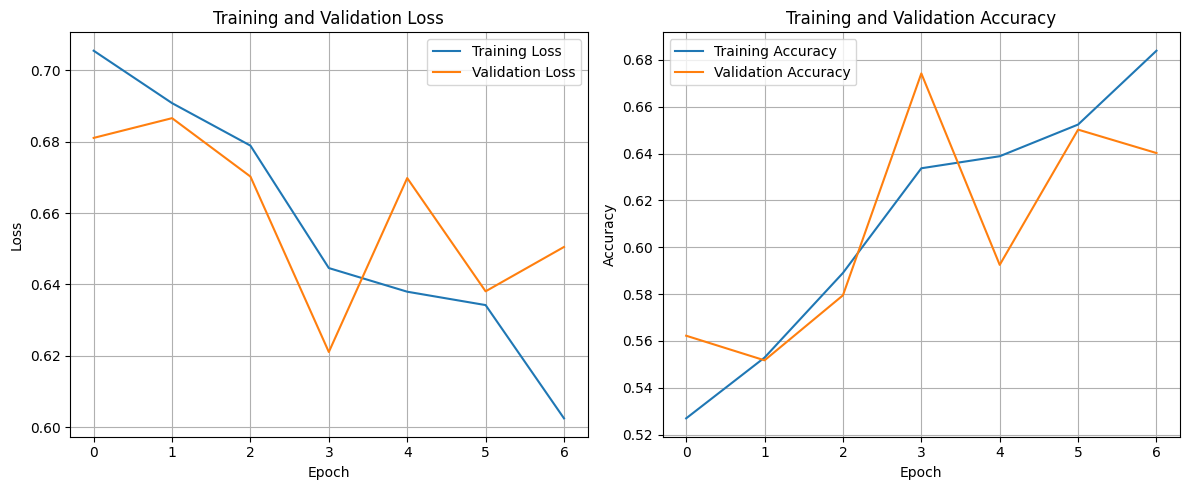

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import accuracy_score, classification_report
import time
import copy

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# RNN Model for text classification
class RNNTextClassifier(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim=128, num_layers=1,
                 bidirectional=False, dropout_rate=0.5, num_classes=2, pad_idx=0):
        super(RNNTextClassifier, self).__init__()

        # Embedding layer
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=pad_idx)

        # RNN layer
        self.rnn = nn.RNN(
            input_size=embedding_dim,
            hidden_size=hidden_dim,
            num_layers=num_layers,
            batch_first=True,
            bidirectional=bidirectional,
            dropout=dropout_rate if num_layers > 1 else 0
        )

        # Determine output size based on bidirectional setting
        rnn_output_dim = hidden_dim * 2 if bidirectional else hidden_dim

        # Output layer
        self.dropout = nn.Dropout(dropout_rate)
        self.fc = nn.Linear(rnn_output_dim, num_classes)

        # Save parameters for reference
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.bidirectional = bidirectional

    def forward(self, input_ids):
        # Get batch size
        batch_size = input_ids.size(0)

        # Embedding layer
        x = self.embedding(input_ids)  # [batch_size, seq_len, embedding_dim]

        # RNN layer
        # Initialize hidden state
        h0 = torch.zeros(self.num_layers * (2 if self.bidirectional else 1),
                         batch_size, self.hidden_dim).to(input_ids.device)

        # Forward pass through RNN
        _, hidden = self.rnn(x, h0)

        # Get the final layer's hidden state
        if self.bidirectional:
            # Concatenate the final forward and backward hidden states
            hidden = torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim=1)
        else:
            # Just use the final hidden state
            hidden = hidden[-1,:,:]

        # Output layer
        x = self.dropout(hidden)
        out = self.fc(x)

        return out

# Training function
def train_epoch(model, train_loader, optimizer, criterion, device):
    model.train()
    epoch_loss = 0
    correct = 0
    total = 0

    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)

        # Forward pass
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        # Calculate accuracy
        _, predicted = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()
        epoch_loss += loss.item() * inputs.size(0)

    return epoch_loss / total, correct / total

# Evaluation function
def evaluate(model, data_loader, criterion, device):
    model.eval()
    epoch_loss = 0
    correct = 0
    total = 0

    all_preds = []
    all_targets = []

    with torch.no_grad():
        for inputs, targets in data_loader:
            inputs, targets = inputs.to(device), targets.to(device)

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, targets)

            # Calculate accuracy
            _, predicted = torch.max(outputs.data, 1)
            total += targets.size(0)
            correct += (predicted == targets).sum().item()
            epoch_loss += loss.item() * inputs.size(0)

            # Store predictions and targets for classification report
            all_preds.extend(predicted.cpu().numpy())
            all_targets.extend(targets.cpu().numpy())

    return epoch_loss / total, correct / total, all_preds, all_targets

# Function to train and evaluate model with early stopping
def train_model(model, train_loader, val_loader, optimizer, criterion, device, num_epochs=20, patience=3):
    # Initialize best validation loss and patience counter
    best_val_loss = float('inf')
    patience_counter = 0
    best_model = None

    # Initialize history for plotting
    history = {
        'train_loss': [],
        'val_loss': [],
        'train_acc': [],
        'val_acc': []
    }

    for epoch in range(num_epochs):
        start_time = time.time()

        # Train the model
        train_loss, train_acc = train_epoch(model, train_loader, optimizer, criterion, device)

        # Evaluate on validation set
        val_loss, val_acc, _, _ = evaluate(model, val_loader, criterion, device)

        # Save history
        history['train_loss'].append(train_loss)
        history['val_loss'].append(val_loss)
        history['train_acc'].append(train_acc)
        history['val_acc'].append(val_acc)

        # Print epoch results
        time_elapsed = time.time() - start_time
        print(f'Epoch {epoch+1}/{num_epochs} | Time: {time_elapsed:.2f}s')
        print(f'Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f}')
        print(f'Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.4f}')
        print('-' * 50)

        # Check if this is the best model so far
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_model = model.state_dict().copy()
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print(f'Early stopping at epoch {epoch+1}')
                break

    # Load the best model
    if best_model:
        model.load_state_dict(best_model)

    return model, history

def plot_history(history):
    plt.figure(figsize=(12, 5))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(history['train_loss'], label='Training Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.grid(True)

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history['train_acc'], label='Training Accuracy')
    plt.plot(history['val_acc'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.savefig('rnn_model_performance.png')
    plt.show()

  #### TARIN and TEST ##########
  # Set parameters for model
vocab_size = 50257  # GPT2 vocab size
pad_token_id = 0    # Default padding token ID

# Create tensors from your data
# Make sure to run your data preparation code first
x_train_tensor = torch.tensor(list(x_train.values))
x_val_tensor = torch.tensor(list(x_val.values))
x_test_tensor = torch.tensor(list(x_test.values))

# Convert labels
if isinstance(y_train.iloc[0], str):
    y_train_tensor = torch.tensor([1 if label == 'positive' else 0 for label in y_train])
    y_val_tensor = torch.tensor([1 if label == 'positive' else 0 for label in y_val])
    y_test_tensor = torch.tensor([1 if label == 'positive' else 0 for label in y_test])
else:
    y_train_tensor = torch.tensor(y_train.values)
    y_val_tensor = torch.tensor(y_val.values)
    y_test_tensor = torch.tensor(y_test.values)

# Create datasets and dataloaders
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
val_dataset = TensorDataset(x_val_tensor, y_val_tensor)
test_dataset = TensorDataset(x_test_tensor, y_test_tensor)

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# Create the model
model = RNNTextClassifier(
    vocab_size=vocab_size,
    embedding_dim=128,
    hidden_dim=256,
    num_layers=1,
    bidirectional=True,
    dropout_rate=0.5,
    pad_idx=pad_token_id
).to(device)

# Create optimizer and criterion
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Train the model
print("Training RNN model...")
model, history = train_model(model, train_loader, val_loader, optimizer, criterion, device, num_epochs=10)

# Evaluate on test set
test_loss, test_acc, test_preds, test_targets = evaluate(model, test_loader, criterion, device)
print(f"\nTest Loss: {test_loss:.4f} | Test Accuracy: {test_acc:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(test_targets, test_preds, target_names=['negative', 'positive']))

# Plot training history
plot_history(history)

##LSTM Layer

Using device: cuda
x_train shape: (36000,)
y_train shape: (36000,)
Training LSTM model...
Epoch 1/10 | Time: 10.14s
Train Loss: 0.6422 | Train Acc: 0.6214
Val Loss: 0.5969 | Val Acc: 0.6633
--------------------------------------------------
Epoch 2/10 | Time: 9.82s
Train Loss: 0.4966 | Train Acc: 0.7675
Val Loss: 0.4555 | Val Acc: 0.7885
--------------------------------------------------
Epoch 3/10 | Time: 9.84s
Train Loss: 0.3857 | Train Acc: 0.8347
Val Loss: 0.4565 | Val Acc: 0.8030
--------------------------------------------------
Epoch 4/10 | Time: 9.78s
Train Loss: 0.3743 | Train Acc: 0.8428
Val Loss: 0.3779 | Val Acc: 0.8420
--------------------------------------------------
Epoch 5/10 | Time: 9.78s
Train Loss: 0.2339 | Train Acc: 0.9094
Val Loss: 0.3602 | Val Acc: 0.8590
--------------------------------------------------
Epoch 6/10 | Time: 9.76s
Train Loss: 0.1743 | Train Acc: 0.9366
Val Loss: 0.3880 | Val Acc: 0.8618
--------------------------------------------------
Epoch 7/1

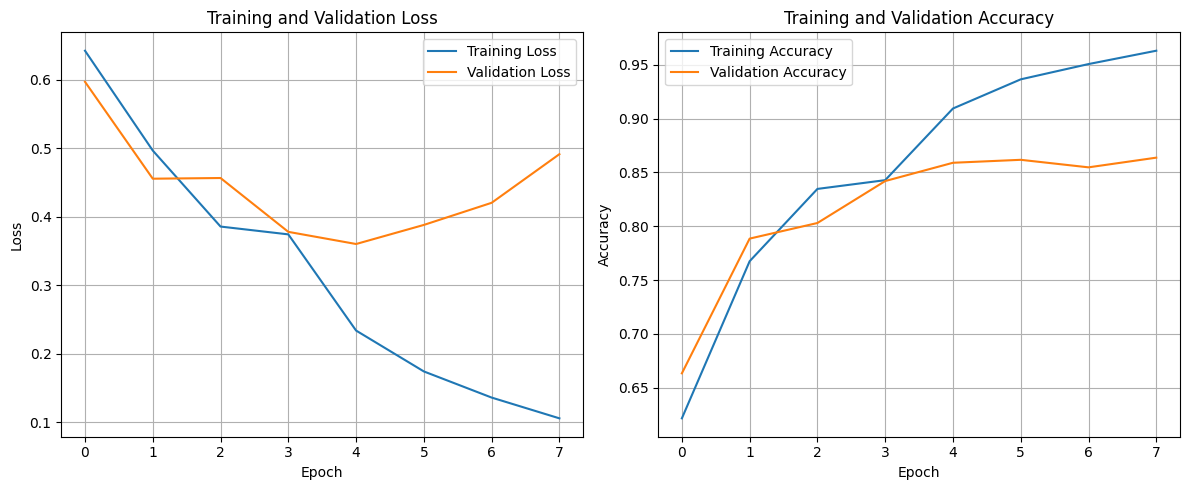

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import accuracy_score, classification_report
import time
import copy

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# LSTM Model for text classification
class LSTMTextClassifier(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim=128, num_layers=1,
                 bidirectional=False, dropout_rate=0.5, num_classes=2, pad_idx=0):
        super(LSTMTextClassifier, self).__init__()

        # Embedding layer
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=pad_idx)

        # LSTM layer
        self.lstm = nn.LSTM(
            input_size=embedding_dim,
            hidden_size=hidden_dim,
            num_layers=num_layers,
            batch_first=True,
            bidirectional=bidirectional,
            dropout=dropout_rate if num_layers > 1 else 0
        )

        # Determine output size based on bidirectional setting
        lstm_output_dim = hidden_dim * 2 if bidirectional else hidden_dim

        # Output layer
        self.dropout = nn.Dropout(dropout_rate)
        self.fc = nn.Linear(lstm_output_dim, num_classes)

        # Save parameters for reference
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.bidirectional = bidirectional

    def forward(self, input_ids):
        # Get batch size
        batch_size = input_ids.size(0)

        # Embedding layer
        x = self.embedding(input_ids)  # [batch_size, seq_len, embedding_dim]

        # LSTM layer
        # Initialize hidden state and cell state
        h0 = torch.zeros(self.num_layers * (2 if self.bidirectional else 1),
                         batch_size, self.hidden_dim).to(input_ids.device)
        c0 = torch.zeros(self.num_layers * (2 if self.bidirectional else 1),
                         batch_size, self.hidden_dim).to(input_ids.device)

        # Forward pass through LSTM
        _, (hidden, _) = self.lstm(x, (h0, c0))

        # Get the final layer's hidden state
        if self.bidirectional:
            # Concatenate the final forward and backward hidden states
            hidden = torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim=1)
        else:
            # Just use the final hidden state
            hidden = hidden[-1,:,:]

        # Output layer
        x = self.dropout(hidden)
        out = self.fc(x)

        return out

# Training function
def train_epoch(model, train_loader, optimizer, criterion, device):
    model.train()
    epoch_loss = 0
    correct = 0
    total = 0

    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)

        # Forward pass
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        # Calculate accuracy
        _, predicted = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()
        epoch_loss += loss.item() * inputs.size(0)

    return epoch_loss / total, correct / total

# Evaluation function
def evaluate(model, data_loader, criterion, device):
    model.eval()
    epoch_loss = 0
    correct = 0
    total = 0

    all_preds = []
    all_targets = []

    with torch.no_grad():
        for inputs, targets in data_loader:
            inputs, targets = inputs.to(device), targets.to(device)

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, targets)

            # Calculate accuracy
            _, predicted = torch.max(outputs.data, 1)
            total += targets.size(0)
            correct += (predicted == targets).sum().item()
            epoch_loss += loss.item() * inputs.size(0)

            # Store predictions and targets for classification report
            all_preds.extend(predicted.cpu().numpy())
            all_targets.extend(targets.cpu().numpy())

    return epoch_loss / total, correct / total, all_preds, all_targets

# Function to train and evaluate model with early stopping
def train_model(model, train_loader, val_loader, optimizer, criterion, device, num_epochs=20, patience=3):
    # Initialize best validation loss and patience counter
    best_val_loss = float('inf')
    patience_counter = 0
    best_model = None

    # Initialize history for plotting
    history = {
        'train_loss': [],
        'val_loss': [],
        'train_acc': [],
        'val_acc': []
    }

    for epoch in range(num_epochs):
        start_time = time.time()

        # Train the model
        train_loss, train_acc = train_epoch(model, train_loader, optimizer, criterion, device)

        # Evaluate on validation set
        val_loss, val_acc, _, _ = evaluate(model, val_loader, criterion, device)

        # Save history
        history['train_loss'].append(train_loss)
        history['val_loss'].append(val_loss)
        history['train_acc'].append(train_acc)
        history['val_acc'].append(val_acc)

        # Print epoch results
        time_elapsed = time.time() - start_time
        print(f'Epoch {epoch+1}/{num_epochs} | Time: {time_elapsed:.2f}s')
        print(f'Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f}')
        print(f'Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.4f}')
        print('-' * 50)

        # Check if this is the best model so far
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_model = model.state_dict().copy()
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print(f'Early stopping at epoch {epoch+1}')
                break

    # Load the best model
    if best_model:
        model.load_state_dict(best_model)

    return model, history

# Hyperparameter optimization function for LSTM
def optimize_lstm_hyperparameters(x_train, y_train, x_val, y_val, vocab_size, pad_token_id):
    print("Converting data to tensors...")

    # Convert to tensors
    x_train_tensor = torch.tensor(list(x_train.values))

    # Convert string labels to numeric if needed
    if isinstance(y_train.iloc[0], str):
        y_train_tensor = torch.tensor([1 if label == 'positive' else 0 for label in y_train])
        y_val_tensor = torch.tensor([1 if label == 'positive' else 0 for label in y_val])
    else:
        y_train_tensor = torch.tensor(y_train.values)
        y_val_tensor = torch.tensor(y_val.values)

    x_val_tensor = torch.tensor(list(x_val.values))

    # Print tensor shapes
    print(f"x_train_tensor shape: {x_train_tensor.shape}")
    print(f"y_train_tensor shape: {y_train_tensor.shape}")

    # Create datasets and dataloaders
    train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
    val_dataset = TensorDataset(x_val_tensor, y_val_tensor)

    batch_size = 64
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size)

    # Define hyperparameter grid - use a smaller grid to save time
    param_grid = {
        'embedding_dim': [128],
        'hidden_dim': [128, 256],
        'num_layers': [1],
        'bidirectional': [False, True],
        'dropout_rate': [0.5],
        'learning_rate': [0.001]
    }

    # Grid search
    best_val_acc = 0
    best_params = None
    criterion = nn.CrossEntropyLoss()

    print("Starting hyperparameter optimization...")
    print("Grid:", param_grid)

    # Try a subset of combinations to save time
    for embedding_dim in param_grid['embedding_dim']:
        for hidden_dim in param_grid['hidden_dim']:
            for num_layers in param_grid['num_layers']:
                for bidirectional in param_grid['bidirectional']:
                    for dropout_rate in param_grid['dropout_rate']:
                        for learning_rate in param_grid['learning_rate']:
                            print(f"\nTrying: embedding_dim={embedding_dim}, hidden_dim={hidden_dim}, "
                                  f"num_layers={num_layers}, bidirectional={bidirectional}, "
                                  f"dropout_rate={dropout_rate}, learning_rate={learning_rate}")

                            # Create model
                            model = LSTMTextClassifier(
                                vocab_size=vocab_size,
                                embedding_dim=embedding_dim,
                                hidden_dim=hidden_dim,
                                num_layers=num_layers,
                                bidirectional=bidirectional,
                                dropout_rate=dropout_rate,
                                pad_idx=pad_token_id
                            ).to(device)

                            # Create optimizer
                            optimizer = optim.Adam(model.parameters(), lr=learning_rate)

                            # Quick evaluation (1 epoch)
                            train_loss, train_acc = train_epoch(model, train_loader, optimizer, criterion, device)
                            val_loss, val_acc, _, _ = evaluate(model, val_loader, criterion, device)

                            print(f"Quick evaluation - Val Accuracy: {val_acc:.4f}")

                            # Check if this is the best configuration
                            if val_acc > best_val_acc:
                                best_val_acc = val_acc
                                best_params = {
                                    'embedding_dim': embedding_dim,
                                    'hidden_dim': hidden_dim,
                                    'num_layers': num_layers,
                                    'bidirectional': bidirectional,
                                    'dropout_rate': dropout_rate,
                                    'learning_rate': learning_rate
                                }

    print("\nBest hyperparameters:")
    print(best_params)
    print(f"Best validation accuracy: {best_val_acc:.4f}")

    return best_params

def plot_history(history):
    plt.figure(figsize=(12, 5))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(history['train_loss'], label='Training Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.grid(True)

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history['train_acc'], label='Training Accuracy')
    plt.plot(history['val_acc'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.savefig('lstm_model_performance.png')
    plt.show()
########## TRAIN and TEST ##########

try:
    print(f"x_train shape: {x_train.shape}")
    print(f"y_train shape: {y_train.shape}")
except NameError:
    print("Data variables not found. Let's load them again.")

    # Re-load your data if needed
    # This is assuming you have the data already processed somewhere
    # If not, you'll need to run your data processing code again

    # For example:
    # df = pd.read_csv("/content/IMDB_Dataset.csv")
    # ...process data as before...

# Set padding token ID
# Since you used GPT2 tokenizer with "[PAD]" as padding token
pad_token_id = 0  # Default padding token ID, typically 0 in most tokenizers
vocab_size = 50257  # GPT2 vocab size

# Convert to tensors
x_train_tensor = torch.tensor(list(x_train.values))
x_val_tensor = torch.tensor(list(x_val.values))
x_test_tensor = torch.tensor(list(x_test.values))

# Convert labels
if y_train.iloc[0] == 'positive' or y_train.iloc[0] == 'negative':
    # String labels
    y_train_tensor = torch.tensor([1 if label == 'positive' else 0 for label in y_train])
    y_val_tensor = torch.tensor([1 if label == 'positive' else 0 for label in y_val])
    y_test_tensor = torch.tensor([1 if label == 'positive' else 0 for label in y_test])
else:
    # Numeric labels
    y_train_tensor = torch.tensor(y_train.values)
    y_val_tensor = torch.tensor(y_val.values)
    y_test_tensor = torch.tensor(y_test.values)

# Create datasets and dataloaders
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
val_dataset = TensorDataset(x_val_tensor, y_val_tensor)
test_dataset = TensorDataset(x_test_tensor, y_test_tensor)

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# Define model parameters
embedding_dim = 128
hidden_dim = 256
bidirectional = True
num_layers = 1
dropout_rate = 0.5
learning_rate = 0.001

# Create model
model = LSTMTextClassifier(
    vocab_size=vocab_size,
    embedding_dim=embedding_dim,
    hidden_dim=hidden_dim,
    num_layers=num_layers,
    bidirectional=bidirectional,
    dropout_rate=dropout_rate,
    pad_idx=pad_token_id
).to(device)

# Create optimizer and criterion
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

# Train the model
print("Training LSTM model...")
model, history = train_model(model, train_loader, val_loader, optimizer, criterion, device, num_epochs=10)

# Evaluate on test set
test_loss, test_acc, test_preds, test_targets = evaluate(model, test_loader, criterion, device)
print(f"\nTest Loss: {test_loss:.4f} | Test Accuracy: {test_acc:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(test_targets, test_preds, target_names=['negative', 'positive']))

# Plot training history
plot_history(history)

##GRU Layer

Using device: cuda
Training GRU model...
Epoch 1/10 | Time: 9.64s
Train Loss: 0.5775 | Train Acc: 0.6889
Val Loss: 0.4275 | Val Acc: 0.8130
--------------------------------------------------
Epoch 2/10 | Time: 9.64s
Train Loss: 0.3537 | Train Acc: 0.8518
Val Loss: 0.3160 | Val Acc: 0.8600
--------------------------------------------------
Epoch 3/10 | Time: 9.63s
Train Loss: 0.2432 | Train Acc: 0.9044
Val Loss: 0.2853 | Val Acc: 0.8810
--------------------------------------------------
Epoch 4/10 | Time: 9.70s
Train Loss: 0.1706 | Train Acc: 0.9386
Val Loss: 0.3142 | Val Acc: 0.8810
--------------------------------------------------
Epoch 5/10 | Time: 9.66s
Train Loss: 0.1072 | Train Acc: 0.9629
Val Loss: 0.3717 | Val Acc: 0.8830
--------------------------------------------------
Epoch 6/10 | Time: 9.67s
Train Loss: 0.0638 | Train Acc: 0.9787
Val Loss: 0.4449 | Val Acc: 0.8798
--------------------------------------------------
Early stopping at epoch 6

Test Loss: 0.4644 | Test Accurac

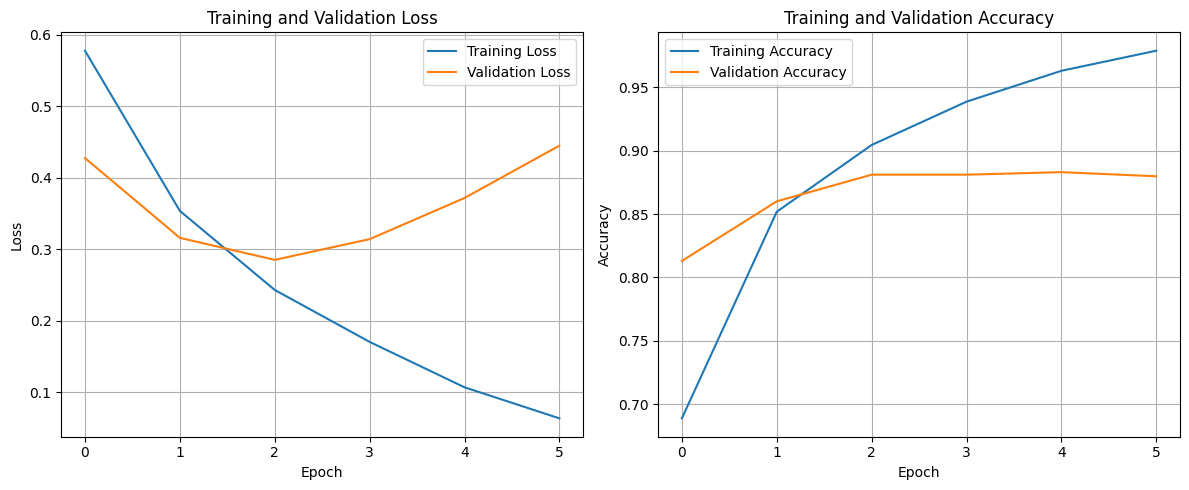

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import accuracy_score, classification_report
import time
import copy

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# GRU Model for text classification
class GRUTextClassifier(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim=128, num_layers=1,
                 bidirectional=False, dropout_rate=0.5, num_classes=2, pad_idx=0):
        super(GRUTextClassifier, self).__init__()

        # Embedding layer
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=pad_idx)

        # GRU layer
        self.gru = nn.GRU(
            input_size=embedding_dim,
            hidden_size=hidden_dim,
            num_layers=num_layers,
            batch_first=True,
            bidirectional=bidirectional,
            dropout=dropout_rate if num_layers > 1 else 0
        )

        # Determine output size based on bidirectional setting
        gru_output_dim = hidden_dim * 2 if bidirectional else hidden_dim

        # Output layer
        self.dropout = nn.Dropout(dropout_rate)
        self.fc = nn.Linear(gru_output_dim, num_classes)

        # Save parameters for reference
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.bidirectional = bidirectional

    def forward(self, input_ids):
        # Get batch size
        batch_size = input_ids.size(0)

        # Embedding layer
        x = self.embedding(input_ids)  # [batch_size, seq_len, embedding_dim]

        # GRU layer
        # Initialize hidden state
        h0 = torch.zeros(self.num_layers * (2 if self.bidirectional else 1),
                         batch_size, self.hidden_dim).to(input_ids.device)

        # Forward pass through GRU
        _, hidden = self.gru(x, h0)

        # Get the final layer's hidden state
        if self.bidirectional:
            # Concatenate the final forward and backward hidden states
            hidden = torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim=1)
        else:
            # Just use the final hidden state
            hidden = hidden[-1,:,:]

        # Output layer
        x = self.dropout(hidden)
        out = self.fc(x)

        return out

# Training function
def train_epoch(model, train_loader, optimizer, criterion, device):
    model.train()
    epoch_loss = 0
    correct = 0
    total = 0

    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)

        # Forward pass
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        # Calculate accuracy
        _, predicted = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()
        epoch_loss += loss.item() * inputs.size(0)

    return epoch_loss / total, correct / total

# Evaluation function
def evaluate(model, data_loader, criterion, device):
    model.eval()
    epoch_loss = 0
    correct = 0
    total = 0

    all_preds = []
    all_targets = []

    with torch.no_grad():
        for inputs, targets in data_loader:
            inputs, targets = inputs.to(device), targets.to(device)

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, targets)

            # Calculate accuracy
            _, predicted = torch.max(outputs.data, 1)
            total += targets.size(0)
            correct += (predicted == targets).sum().item()
            epoch_loss += loss.item() * inputs.size(0)

            # Store predictions and targets for classification report
            all_preds.extend(predicted.cpu().numpy())
            all_targets.extend(targets.cpu().numpy())

    return epoch_loss / total, correct / total, all_preds, all_targets

# Function to train and evaluate model with early stopping
def train_model(model, train_loader, val_loader, optimizer, criterion, device, num_epochs=20, patience=3):
    # Initialize best validation loss and patience counter
    best_val_loss = float('inf')
    patience_counter = 0
    best_model = None

    # Initialize history for plotting
    history = {
        'train_loss': [],
        'val_loss': [],
        'train_acc': [],
        'val_acc': []
    }

    for epoch in range(num_epochs):
        start_time = time.time()

        # Train the model
        train_loss, train_acc = train_epoch(model, train_loader, optimizer, criterion, device)

        # Evaluate on validation set
        val_loss, val_acc, _, _ = evaluate(model, val_loader, criterion, device)

        # Save history
        history['train_loss'].append(train_loss)
        history['val_loss'].append(val_loss)
        history['train_acc'].append(train_acc)
        history['val_acc'].append(val_acc)

        # Print epoch results
        time_elapsed = time.time() - start_time
        print(f'Epoch {epoch+1}/{num_epochs} | Time: {time_elapsed:.2f}s')
        print(f'Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f}')
        print(f'Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.4f}')
        print('-' * 50)

        # Check if this is the best model so far
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_model = model.state_dict().copy()
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print(f'Early stopping at epoch {epoch+1}')
                break

    # Load the best model
    if best_model:
        model.load_state_dict(best_model)

    return model, history

def plot_history(history):
    plt.figure(figsize=(12, 5))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(history['train_loss'], label='Training Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.grid(True)

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history['train_acc'], label='Training Accuracy')
    plt.plot(history['val_acc'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.savefig('gru_model_performance.png')
    plt.show()

##### TRAIN and TEST #######
# Set parameters for model
vocab_size = 50257  # GPT2 vocab size
pad_token_id = 0    # Default padding token ID

# Create tensors from your data
# Make sure to run your data preparation code first
x_train_tensor = torch.tensor(list(x_train.values))
x_val_tensor = torch.tensor(list(x_val.values))
x_test_tensor = torch.tensor(list(x_test.values))

# Convert labels
if isinstance(y_train.iloc[0], str):
    y_train_tensor = torch.tensor([1 if label == 'positive' else 0 for label in y_train])
    y_val_tensor = torch.tensor([1 if label == 'positive' else 0 for label in y_val])
    y_test_tensor = torch.tensor([1 if label == 'positive' else 0 for label in y_test])
else:
    y_train_tensor = torch.tensor(y_train.values)
    y_val_tensor = torch.tensor(y_val.values)
    y_test_tensor = torch.tensor(y_test.values)

# Create datasets and dataloaders
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
val_dataset = TensorDataset(x_val_tensor, y_val_tensor)
test_dataset = TensorDataset(x_test_tensor, y_test_tensor)

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# Create the model
model = GRUTextClassifier(
    vocab_size=vocab_size,
    embedding_dim=128,
    hidden_dim=256,
    num_layers=1,
    bidirectional=True,
    dropout_rate=0.5,
    pad_idx=pad_token_id
).to(device)

# Create optimizer and criterion
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Train the model
print("Training GRU model...")
model, history = train_model(model, train_loader, val_loader, optimizer, criterion, device, num_epochs=10)

# Evaluate on test set
test_loss, test_acc, test_preds, test_targets = evaluate(model, test_loader, criterion, device)
print(f"\nTest Loss: {test_loss:.4f} | Test Accuracy: {test_acc:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(test_targets, test_preds, target_names=['negative', 'positive']))

# Plot training history
plot_history(history)

##Transformer with positional embedding

Using device: cuda
Training Transformer model...
Epoch 1/10 | Time: 11.05s
Train Loss: 0.5922 | Train Acc: 0.6539
Val Loss: 0.4646 | Val Acc: 0.7770
--------------------------------------------------
Epoch 2/10 | Time: 10.99s
Train Loss: 0.4496 | Train Acc: 0.7874
Val Loss: 0.4061 | Val Acc: 0.8150
--------------------------------------------------
Epoch 3/10 | Time: 10.97s
Train Loss: 0.3984 | Train Acc: 0.8180
Val Loss: 0.3708 | Val Acc: 0.8363
--------------------------------------------------
Epoch 4/10 | Time: 10.96s
Train Loss: 0.3650 | Train Acc: 0.8376
Val Loss: 0.3483 | Val Acc: 0.8462
--------------------------------------------------
Epoch 5/10 | Time: 10.95s
Train Loss: 0.3427 | Train Acc: 0.8501
Val Loss: 0.3448 | Val Acc: 0.8535
--------------------------------------------------
Epoch 6/10 | Time: 10.94s
Train Loss: 0.3209 | Train Acc: 0.8614
Val Loss: 0.3242 | Val Acc: 0.8598
--------------------------------------------------
Epoch 7/10 | Time: 10.95s
Train Loss: 0.3072 

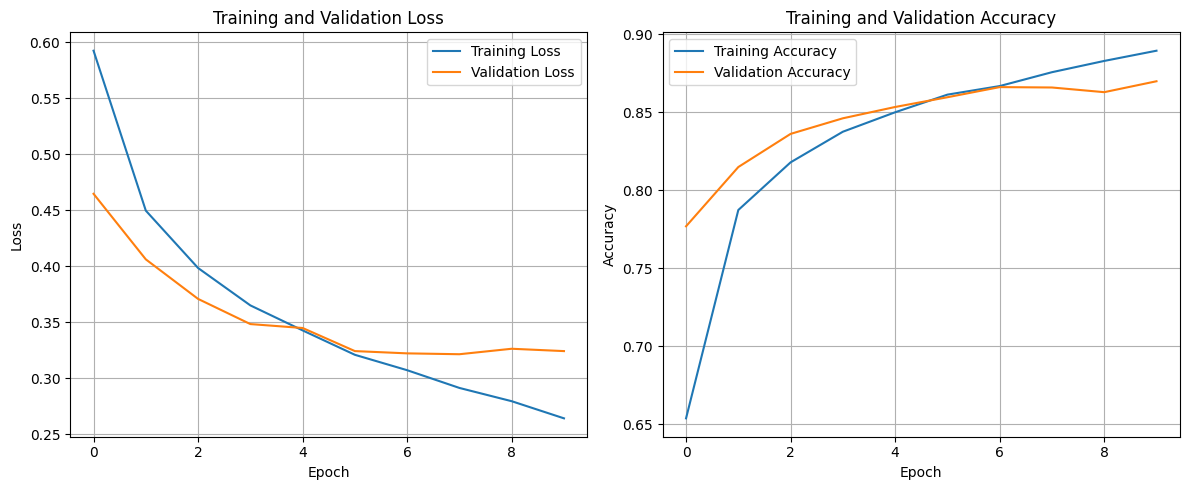

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import accuracy_score, classification_report
import time
import copy
import math

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Positional Encoding for Transformer
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_seq_len=5000, dropout=0.1):
        super(PositionalEncoding, self).__init__()
        self.dropout = nn.Dropout(p=dropout)

        # Create positional encoding matrix
        pe = torch.zeros(max_seq_len, d_model)
        position = torch.arange(0, max_seq_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))

        # Apply sine to even indices and cosine to odd indices
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)

        # Add batch dimension [1, max_seq_len, d_model]
        pe = pe.unsqueeze(0)

        # Register as buffer (not a parameter but should be saved with model)
        self.register_buffer('pe', pe)

    def forward(self, x):
        # Add positional encoding to embedding
        x = x + self.pe[:, :x.size(1), :]
        return self.dropout(x)

# Multi-head Self-Attention Block
class MultiHeadAttention(nn.Module):
    def __init__(self, d_model, num_heads, dropout=0.1):
        super(MultiHeadAttention, self).__init__()
        assert d_model % num_heads == 0, "d_model must be divisible by num_heads"

        self.d_model = d_model
        self.num_heads = num_heads
        self.d_k = d_model // num_heads

        # Linear projections for Q, K, V
        self.query = nn.Linear(d_model, d_model)
        self.key = nn.Linear(d_model, d_model)
        self.value = nn.Linear(d_model, d_model)

        # Output projection
        self.output = nn.Linear(d_model, d_model)

        self.dropout = nn.Dropout(dropout)

    def forward(self, x, mask=None):
        batch_size = x.size(0)

        # Linear projections and reshape
        q = self.query(x).view(batch_size, -1, self.num_heads, self.d_k).transpose(1, 2)
        k = self.key(x).view(batch_size, -1, self.num_heads, self.d_k).transpose(1, 2)
        v = self.value(x).view(batch_size, -1, self.num_heads, self.d_k).transpose(1, 2)

        # Scaled dot-product attention
        scores = torch.matmul(q, k.transpose(-2, -1)) / math.sqrt(self.d_k)

        # Apply mask if provided
        if mask is not None:
            scores = scores.masked_fill(mask == 0, -1e9)

        # Apply softmax to get attention weights
        attn_weights = F.softmax(scores, dim=-1)
        attn_weights = self.dropout(attn_weights)

        # Apply attention weights to values
        context = torch.matmul(attn_weights, v)

        # Reshape back and apply output projection
        context = context.transpose(1, 2).contiguous().view(batch_size, -1, self.d_model)
        output = self.output(context)

        return output

# Feed-Forward Network Block
class FeedForward(nn.Module):
    def __init__(self, d_model, d_ff, dropout=0.1):
        super(FeedForward, self).__init__()
        self.linear1 = nn.Linear(d_model, d_ff)
        self.dropout = nn.Dropout(dropout)
        self.linear2 = nn.Linear(d_ff, d_model)

    def forward(self, x):
        x = self.dropout(F.relu(self.linear1(x)))
        x = self.linear2(x)
        return x

# Transformer Encoder Layer
class EncoderLayer(nn.Module):
    def __init__(self, d_model, num_heads, d_ff, dropout=0.1):
        super(EncoderLayer, self).__init__()
        self.self_attn = MultiHeadAttention(d_model, num_heads, dropout)
        self.feed_forward = FeedForward(d_model, d_ff, dropout)

        self.norm1 = nn.LayerNorm(d_model)
        self.norm2 = nn.LayerNorm(d_model)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x, mask=None):
        # Self-attention with residual connection and layer normalization
        attn_output = self.self_attn(x, mask)
        x = self.norm1(x + self.dropout(attn_output))

        # Feed-forward with residual connection and layer normalization
        ff_output = self.feed_forward(x)
        x = self.norm2(x + self.dropout(ff_output))

        return x

# Transformer Encoder
class TransformerEncoder(nn.Module):
    def __init__(self, vocab_size, d_model, num_heads, num_layers, d_ff, max_seq_len=5000, dropout=0.1, pad_idx=0):
        super(TransformerEncoder, self).__init__()

        self.embedding = nn.Embedding(vocab_size, d_model, padding_idx=pad_idx)
        self.positional_encoding = PositionalEncoding(d_model, max_seq_len, dropout)

        # Stack of encoder layers
        self.layers = nn.ModuleList([
            EncoderLayer(d_model, num_heads, d_ff, dropout)
            for _ in range(num_layers)
        ])

        self.dropout = nn.Dropout(dropout)
        self.pad_idx = pad_idx

    def forward(self, x):
        # Create padding mask
        padding_mask = (x != self.pad_idx).unsqueeze(1).unsqueeze(2)

        # Embedding with positional encoding
        x = self.embedding(x)
        x = self.positional_encoding(x)

        # Apply encoder layers
        for layer in self.layers:
            x = layer(x, padding_mask)

        return x

# Transformer Text Classifier
class TransformerTextClassifier(nn.Module):
    def __init__(self, vocab_size, d_model=128, num_heads=8, num_layers=2,
                 d_ff=512, max_seq_len=5000, dropout=0.1, num_classes=2, pad_idx=0):
        super(TransformerTextClassifier, self).__init__()

        self.transformer_encoder = TransformerEncoder(
            vocab_size, d_model, num_heads, num_layers, d_ff, max_seq_len, dropout, pad_idx
        )

        # Classification head
        self.classifier = nn.Linear(d_model, num_classes)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        # Get transformer encoder output
        encoder_output = self.transformer_encoder(x)

        # Global average pooling over sequence dimension
        pooled_output = encoder_output.mean(dim=1)

        # Apply dropout and classification layer
        pooled_output = self.dropout(pooled_output)
        logits = self.classifier(pooled_output)

        return logits

# Training function
def train_epoch(model, train_loader, optimizer, criterion, device):
    model.train()
    epoch_loss = 0
    correct = 0
    total = 0

    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)

        # Forward pass
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        # Calculate accuracy
        _, predicted = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()
        epoch_loss += loss.item() * inputs.size(0)

    return epoch_loss / total, correct / total

# Evaluation function
def evaluate(model, data_loader, criterion, device):
    model.eval()
    epoch_loss = 0
    correct = 0
    total = 0

    all_preds = []
    all_targets = []

    with torch.no_grad():
        for inputs, targets in data_loader:
            inputs, targets = inputs.to(device), targets.to(device)

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, targets)

            # Calculate accuracy
            _, predicted = torch.max(outputs.data, 1)
            total += targets.size(0)
            correct += (predicted == targets).sum().item()
            epoch_loss += loss.item() * inputs.size(0)

            # Store predictions and targets for classification report
            all_preds.extend(predicted.cpu().numpy())
            all_targets.extend(targets.cpu().numpy())

    return epoch_loss / total, correct / total, all_preds, all_targets

# Function to train and evaluate model with early stopping
def train_model(model, train_loader, val_loader, optimizer, criterion, device, num_epochs=20, patience=3):
    # Initialize best validation loss and patience counter
    best_val_loss = float('inf')
    patience_counter = 0
    best_model = None

    # Initialize history for plotting
    history = {
        'train_loss': [],
        'val_loss': [],
        'train_acc': [],
        'val_acc': []
    }

    for epoch in range(num_epochs):
        start_time = time.time()

        # Train the model
        train_loss, train_acc = train_epoch(model, train_loader, optimizer, criterion, device)

        # Evaluate on validation set
        val_loss, val_acc, _, _ = evaluate(model, val_loader, criterion, device)

        # Save history
        history['train_loss'].append(train_loss)
        history['val_loss'].append(val_loss)
        history['train_acc'].append(train_acc)
        history['val_acc'].append(val_acc)

        # Print epoch results
        time_elapsed = time.time() - start_time
        print(f'Epoch {epoch+1}/{num_epochs} | Time: {time_elapsed:.2f}s')
        print(f'Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f}')
        print(f'Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.4f}')
        print('-' * 50)

        # Check if this is the best model so far
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_model = model.state_dict().copy()
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print(f'Early stopping at epoch {epoch+1}')
                break

    # Load the best model
    if best_model:
        model.load_state_dict(best_model)

    return model, history

def plot_history(history):
    plt.figure(figsize=(12, 5))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(history['train_loss'], label='Training Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.grid(True)

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history['train_acc'], label='Training Accuracy')
    plt.plot(history['val_acc'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.savefig('transformer_model_performance.png')
    plt.show()

#### TRAIN and TEST #####
# Set parameters for model
vocab_size = 50257  # GPT2 vocab size
pad_token_id = 0    # Default padding token ID

# Create tensors from your data
# Make sure to run your data preparation code first
x_train_tensor = torch.tensor(list(x_train.values))
x_val_tensor = torch.tensor(list(x_val.values))
x_test_tensor = torch.tensor(list(x_test.values))

# Convert labels
if isinstance(y_train.iloc[0], str):
    y_train_tensor = torch.tensor([1 if label == 'positive' else 0 for label in y_train])
    y_val_tensor = torch.tensor([1 if label == 'positive' else 0 for label in y_val])
    y_test_tensor = torch.tensor([1 if label == 'positive' else 0 for label in y_test])
else:
    y_train_tensor = torch.tensor(y_train.values)
    y_val_tensor = torch.tensor(y_val.values)
    y_test_tensor = torch.tensor(y_test.values)

# Create datasets and dataloaders
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
val_dataset = TensorDataset(x_val_tensor, y_val_tensor)
test_dataset = TensorDataset(x_test_tensor, y_test_tensor)

batch_size = 32  # Smaller batch size for transformer due to memory requirements
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# Create the model
model = TransformerTextClassifier(
    vocab_size=vocab_size,
    d_model=128,        # Embedding dimension
    num_heads=8,        # Number of attention heads
    num_layers=2,       # Number of transformer layers
    d_ff=512,           # Feed-forward dimension
    dropout=0.1,
    num_classes=2,
    pad_idx=pad_token_id
).to(device)

# Create optimizer and criterion
optimizer = optim.Adam(model.parameters(), lr=0.0001)  # Lower learning rate for transformer
criterion = nn.CrossEntropyLoss()

# Train the model
print("Training Transformer model...")
model, history = train_model(model, train_loader, val_loader, optimizer, criterion, device, num_epochs=10)

# Evaluate on test set
test_loss, test_acc, test_preds, test_targets = evaluate(model, test_loader, criterion, device)
print(f"\nTest Loss: {test_loss:.4f} | Test Accuracy: {test_acc:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(test_targets, test_preds, target_names=['negative', 'positive']))

# Plot training history
plot_history(history)